In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [124]:
df = pd.read_csv('Cleaned Datasets/Merged_data.csv')
# Extract data for USA and Japan
USA = df[df['Country'] == "UNITED STATES"].reset_index()
JAPAN = df[df['Country'] == "JAPAN"].reset_index()
# Only use GDP data
USA = USA[['Country', 'Year', 'GDP']]
JAPAN = JAPAN[['Country', 'Year', 'GDP']]

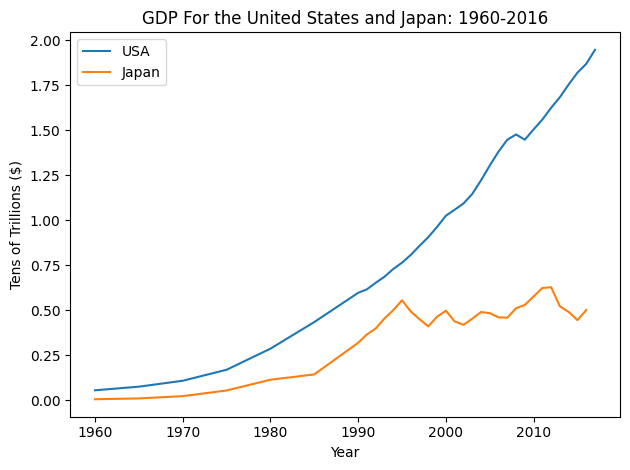

In [125]:
# Plot initial results
fig, ax = plt.subplots(1)
USA.plot(x="Year", y="GDP", ax=ax, label="USA")
JAPAN.plot(x="Year", y="GDP", ax=ax, label="Japan")
plt.title("GDP For the United States and Japan: 1960-2016")
ax.set_ylabel("Tens of Trillions ($)")
plt.gca().yaxis.get_offset_text().set_visible(False)  # Hide the offset text
plt.tight_layout()
plt.show()

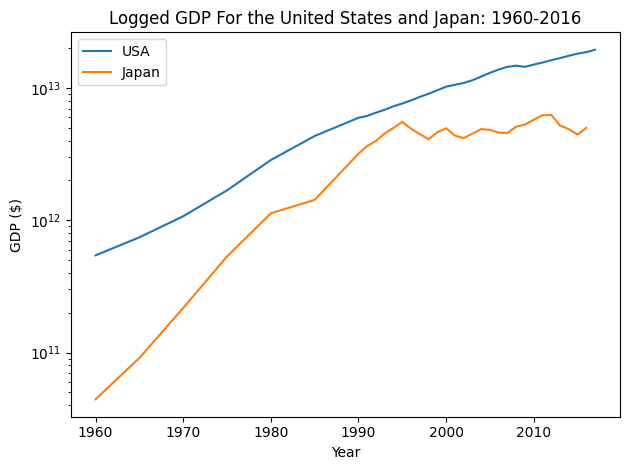

In [126]:
# Plot the logged models
fig, ax = plt.subplots(1)
ax.set_yscale("log")
USA.plot(x="Year", y="GDP", ax=ax, label="USA")
JAPAN.plot(x="Year", y="GDP", ax=ax, label="Japan")
plt.title("Logged GDP For the United States and Japan: 1960-2016")
ax.set_ylabel("GDP ($)")
plt.gca().yaxis.get_offset_text().set_visible(False)  # Hide the offset text
plt.tight_layout()
plt.show()

This seems to indicate that a multiplicative model would be helpful.

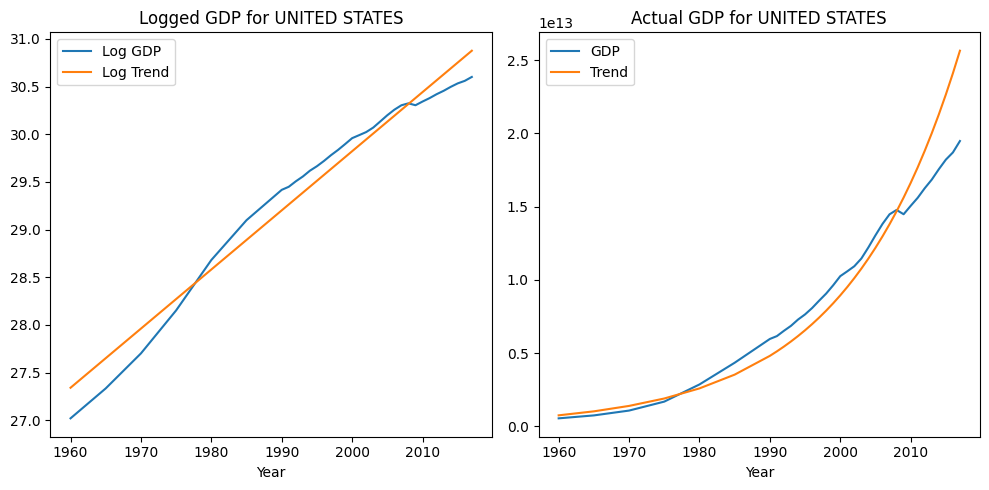

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_GDP   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     886.0
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           6.76e-25
Time:                        20:26:51   Log-Likelihood:                 12.163
No. Observations:                  34   AIC:                            -20.33
Df Residuals:                      32   BIC:                            -17.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -94.1619      4.161    -22.628      0.000    -102.638     -85.686
Year           0.0620      0.002     29.766      0.000       0.058       0.066
==============================================================================
Omnibus:                        7.561   Durbin-Watson:                   0.102
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                3.534
Skew:                          -0.538   Prob(JB):                        0.171
Kurtosis:                       1.843   Cond. No.                     2.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
def FitTrendAndPlot(df):
    '''df - the dataframe of the country data'''
    df['log_GDP'] = np.log(df['GDP'])
    y = df['log_GDP']
    X = sm.add_constant(df['Year'])

    model = sm.OLS(y, X).fit()
    y_pred = model.predict(X)

    # Plot the results, both logged and the original
    fig, axs = plt.subplots(1,2, figsize=(10,5))

    df.plot(y='log_GDP', x='Year', ax=axs[0], label="Log GDP")
    axs[0].plot(df['Year'], y_pred, label="Log Trend")
    axs[0].set_title(f"Logged GDP for {df['Country'][0]}")
    axs[0].legend()

    df.plot(y='GDP', x='Year', ax=axs[1], label="GDP")
    axs[1].plot(df['Year'], np.exp(y_pred), label="Trend")
    axs[1].set_title(f"Actual GDP for {df['Country'][0]}")
    axs[1].legend()

    plt.tight_layout()
    plt.show()
    return model.summary()

FitTrendAndPlot(USA)

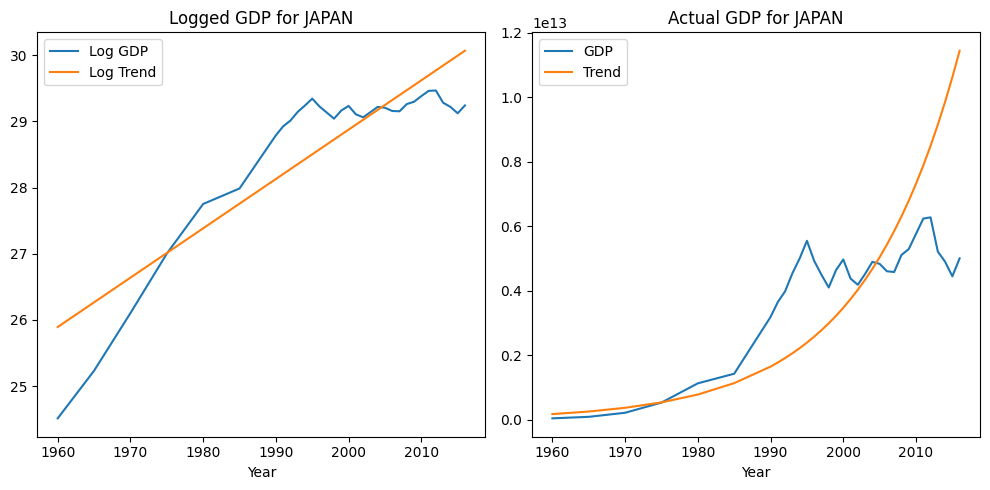

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_GDP   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     107.7
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           1.30e-11
Time:                        20:26:52   Log-Likelihood:                -28.111
No. Observations:                  33   AIC:                             60.22
Df Residuals:                      31   BIC:                             63.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -120.1877     14.342     -8.380      0.000    -149.439     -90.936
Year           0.0745      0.007     10.380      0.000       0.060       0.089
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.236
Skew:                          -0.410   Prob(JB):                        0.539
Kurtosis:                       2.524   Cond. No.                     2.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
FitTrendAndPlot(JAPAN)